Data Description for Days PM2.5:
Mean: 157.72
Median: 161.0
Standard Deviation: 123.09


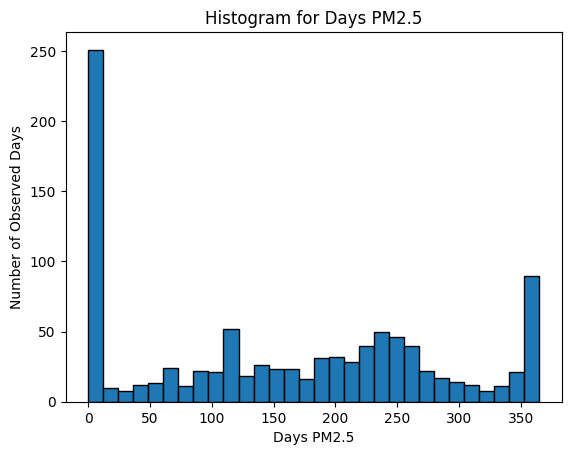

Data Description for Good Days:
Mean: 224.18
Median: 224.0
Standard Deviation: 69.98


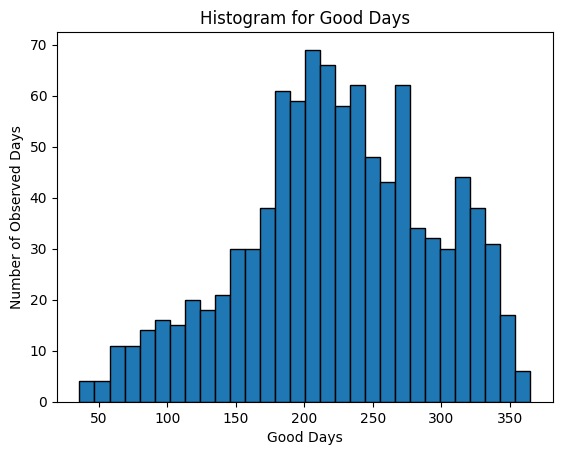

In [34]:
### DATA DESCRIPTION ###

## MEAN, MEDIAN, AND STDEV 
import pandas as pd
import matplotlib.pyplot as plt

filename= 'countyaqi.csv'
data= pd.read_csv(filename)

#define variables of interest 
variables= ['Days PM2.5', 'Good Days']

#loop through both variables to calculate stats and plot histogram 
for column in variables:
    print(f"Data Description for {column}:")
    
    #put data into list 
    raw_data= data[column].tolist()
    col_data= [] #initialize list for numerical data 
    for value in raw_data:
        if isinstance(value, (int, float)):  #exclude all nonnumerical values 
            col_data.append(value) #add numerical data to list 
    #sort data for median calculation
    col_data.sort() 
    
    # calculating mean 
    total= sum(col_data)
    count= len(col_data)
    mean= total/count

    #calculating median
    if count %2 != 0:  # if total number of values is odd
        median= col_data[count // 2] #median is middle number 
    else:  # if even
        mid_ind= count // 2 
        median= (col_data[mid_ind - 1] + col_data[mid_ind]) / 2 #median is average of middle two numbers 
    
    #calculating standard deviation - using mathematical equations 
    variance= sum((x - mean) ** 2 for x in col_data) / count
    std_dev= variance ** 0.5 

    print(f"Mean: {mean:.2f}")
    print(f"Median: {median}")
    print(f"Standard Deviation: {std_dev:.2f}")

 ## PLOTTING HISTOGRAMS
    plt.hist(col_data, bins=30, edgecolor='black')
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Number of Observed Days')
    plt.show()

#countyaqi.csv

In [37]:
### CORRELATION ###

import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, linregress

#initialize variable lists 
pm25= list(data['Days PM2.5'])
good= list(data['Good Days'])

# Step 1: Filter out missing or invalid data manually
PM25= []
GOOD= []

for i in range(len(pm25)):
    #add valid numbers to list and avoid strings
    if isinstance(pm25[i], (int, float)) and isinstance(good[i], (int, float)):
        PM25.append(pm25[i])
        GOOD.append(good[i])

#calculating correlation coefficients 
pearson, _= pearsonr(PM25, GOOD)
spearman, _= spearmanr(PM25, GOOD)
#use linregress function to create line 
slope, intercept, r, p, std_error = linregress(PM25, GOOD)
#predicted y-values for the regression line using results
predicted_y= [slope * x + intercept for x in PM25]

#print results 
print("Pearson Correlation Coefficient: ", pearson)
print("Spearman Correlation Coefficient: ", spearman)
print("Linear Regression Equation: y = " + str(slope) + "x + " + str(intercept))
print("R-squared Value: ", r**2)  

#plot raw data with regression line 
plt.scatter(PM25, GOOD, color='blue', label='Raw Data',) #variables for x and y 
plt.plot(PM25, predicted_y, color='red', label='Regression Line') #plot all data points for PM2.5 and line of best fit
plt.title('Days PM2.5 vs Good Days')
plt.xlabel('Days PM2.5')
plt.ylabel('Good Days')
plt.show()

SyntaxError: invalid decimal literal (3671428212.py, line 29)

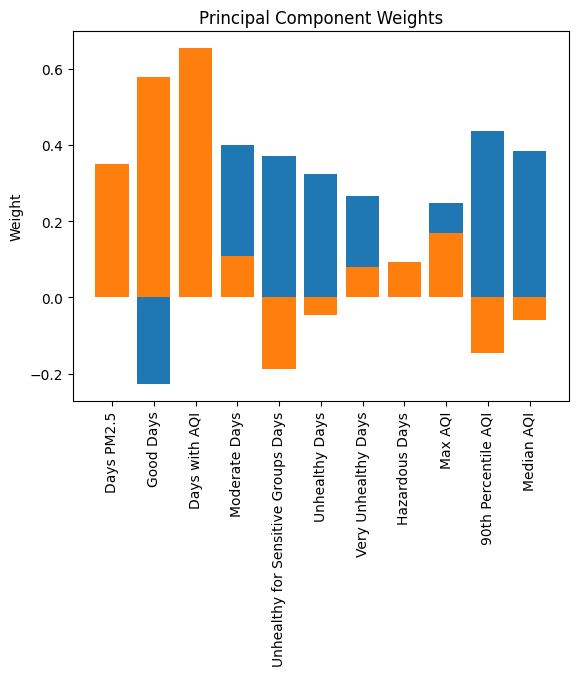

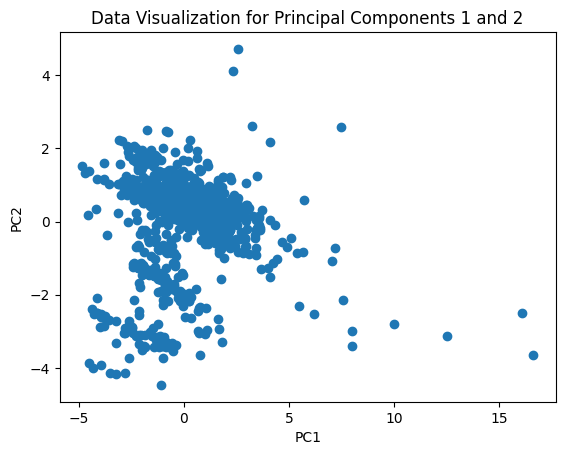

In [31]:
### DIMENSIONALITY REDUCTION ###

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#include all quantitative variables 
quant_vars = ['Days PM2.5', 'Good Days', 'Days with AQI', 'Moderate Days','Unhealthy for Sensitive Groups Days',
 'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days', 'Max AQI','90th Percentile AQI', 'Median AQI']

#store data into new list 
pca_data = data[quant_vars]

#standardizing the data 
std_data = (pca_data - pca_data.mean()) / pca_data.std()

pca = PCA(n_components=2)  #we have two components 
pca_transformed = pca.fit_transform(std_data) #transform the the pca data 
pc_weights = pca.components_ #extracting weights

#plotting the bar charts for the pc weights 
x_labels = quant_vars
plt.bar(x_labels, pc_weights[0], label='PC1') #pc1 weights
plt.bar(x_labels, pc_weights[1], label='PC2') #pc2 weights
plt.xticks(rotation=90) #fit category labels
plt.ylabel('Weight')
plt.title('Principal Component Weights')
plt.show()

#plotting visualization of principal component data 
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Data Visualization for Principal Components 1 and 2')
plt.show()
